<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana8/ECalor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = np.linspace(0,1,10)
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [12]:
T = np.zeros_like(x)
# Condiciones de frontera
T[0] = 10
T[-1] = 100
T

array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 100.])

In [13]:
A = np.zeros((x.shape[0]-2,x.shape[0]-2))
A

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
b = np.zeros(x.shape[0]-2)
b[0] = -T[0]
b[-1] = -T[-1]
b

array([ -10.,    0.,    0.,    0.,    0.,    0.,    0., -100.])

In [15]:
A[0,0] = -2
A[0,1] = 1
A[-1,-1] = -2
A[-1,-2] = 1
A

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [16]:
for i in range(1,A.shape[0]-1):
  for j in range(1,A.shape[1]-1):
    if i == j:
      A[i,j] = -2
      A[i,i-1] = 1
      A[i,i+1] = 1

In [17]:
A

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

In [ ]:
def GaussSeidel(A,b,x0, itmax = 10000, tolerancia = 1e-10):

  x = x0.copy()

  for it in range(itmax):

    # Hacemos una copia del vector x
    x_new = np.copy(x)

    for i in range(A.shape[0]):

      # Contabilizamos la suma del iterador
      Suma = 0.
      for j in range(A.shape[1]):
        if i != j:
          Suma += A[i,j]*x_new[j]
          # La diferencia radica en que ahora la suma es
          # calcula usando x_new recien actualizado
        x_new[i] = (b[i] - Suma)/A[i,i]

    #print(x_new)

    # Criterio de convergencia
    if np.linalg.norm( np.dot(A,x_new)-b) < tolerancia:
      break

    x = np.copy(x_new)

  print(it)

  return x, it

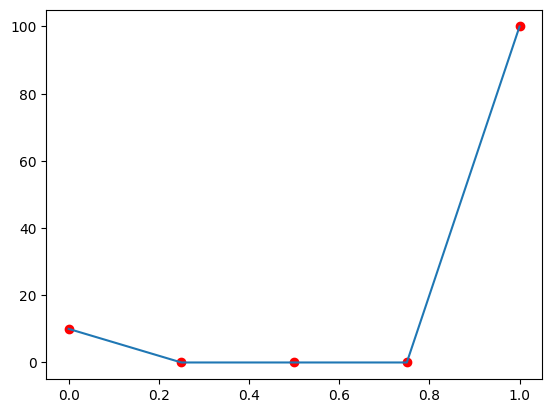

In [4]:
plt.plot(x,T)
plt.scatter(x,T,color='r')